## Daniel Dorado - Sofía Álvarez

In [1]:
#ESAI
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.constants import mu_0, c, e
import mpl_toolkits.mplot3d.axes3d as axes3d

### Gráfica punto 1

In [2]:
def intensity(h, R):
    return (R**2)*h/(R**2 + h**2)**(5/2)

In [3]:
h = 8
R = np.linspace(0,100,1000)
I_xy = intensity(h,R)

In [4]:
max_I_xy = np.max(I_xy)
max_R = R[np.argmax(I_xy)]
print('El maximo es: ({},{})'.format(max_R, max_I_xy))

El maximo es: (6.506506506506507,0.0029046843489870314)


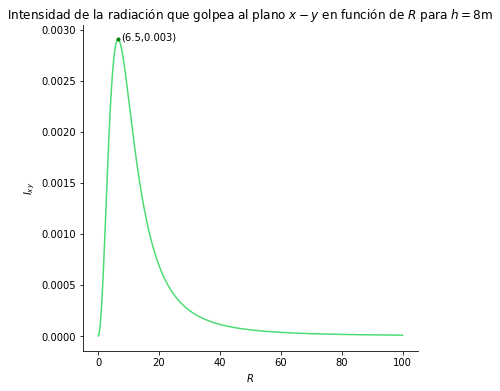

In [5]:
plt.figure(figsize=(6,6))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(R, I_xy, color='#4ddb73')
plt.plot(max_R, max_I_xy,'.', color='green')
plt.text(x=max_R+1, y=max_I_xy, s=r'({},{})'.format(np.round(max_R, 1), np.round(max_I_xy, 3)), color='black')
plt.xlabel(r'$R$')
plt.ylabel(r'$I_{xy}$')
plt.title('Intensidad de la radiación que golpea al plano $x-y$ en función de $R$ para $h=${}m'.format(h))
plt.show()

### Gráficas punto 2

In [13]:
theta = np.linspace(0,np.pi,1000)
phi = np.linspace(0,2*np.pi,1000)

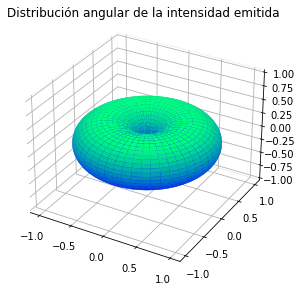

In [44]:
THETA, PHI = np.meshgrid(theta, phi)
X = np.cos(PHI)*np.sin(THETA)**3
Y = np.sin(PHI)*np.sin(THETA)**3 
Z = np.cos(THETA)*np.sin(THETA)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim3d(-1,1)
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.gca(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.tight_layout()
plt.suptitle(r'Distribución angular de la intensidad emitida')
plt.show()

### Gráficas punto 3

In [45]:
def dP_dOmega_linear(theta, beta):
    return (np.sin(theta)**2)/(1 - beta*np.cos(theta))**5

In [46]:
theta = np.linspace(0, 2*np.pi, 1000)

In [47]:
betas = [0.1, 0.4, 0.7, 0.9, 0.95]
colors = ['paleturquoise', 'pink', 'dodgerblue', 'lightgreen', 'darkviolet']

In [48]:
r = []
for i in range(len(betas)):
    r.append(dP_dOmega_linear(theta, betas[i]))

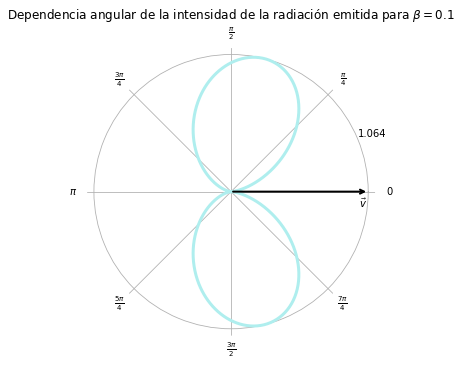

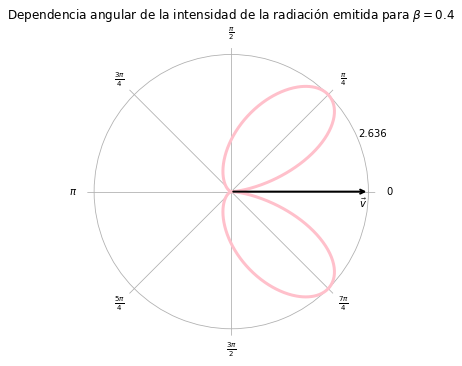

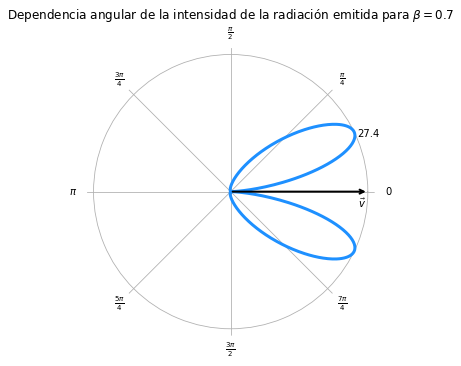

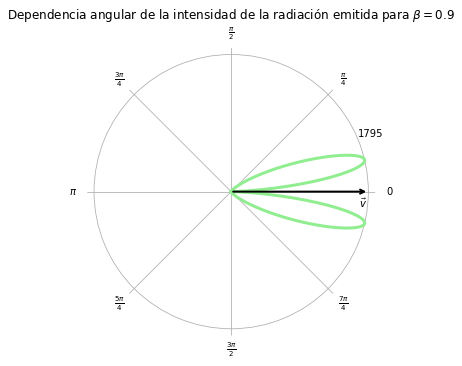

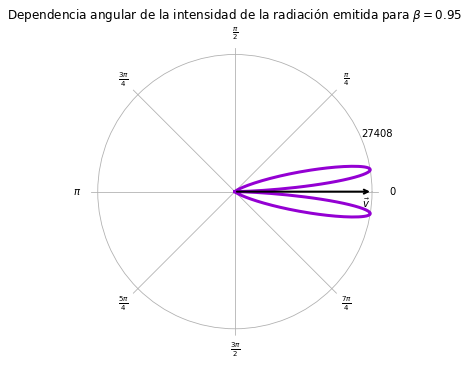

In [49]:
for i in range(len(r)):
    fig = plt.figure()
    rect = [1, 1, 1, 1]
    ax_polar = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar.set_yticks([np.max(r[i])])
    ax_polar.annotate(text=r'', xy=(0,np.max(r[i])), xytext=(0,0), arrowprops=dict(arrowstyle='->', linewidth=2, color='black'))
    ax_polar.text(x=-0.125, y=np.max(r[i])*15/16, s=r'$\vec{v}$', color='black')
    ax_polar.plot(theta, r[i], linewidth=3, color=colors[i])
    ax_polar.set_title(r'Dependencia angular de la intensidad de la radiación emitida para $\beta=${}'.format(betas[i]))
    x_ticks = plt.xticks()[0]
    x_labels =['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
    plt.xticks(x_ticks, x_labels)
    plt.show()

In [50]:
for i in range(len(r)):
    factor = (mu_0*(e**2))/(16*(np.pi**2)*c)
    max_P = factor*np.max(r[i])
    print('Para beta={} la maxima potencia irradiada es del orden de P={}a^2'.format(betas[i], max_P))

Para beta=0.1 la maxima potencia irradiada es del orden de P=7.2506547103236e-55a^2
Para beta=0.4 la maxima potencia irradiada es del orden de P=1.7960486848477385e-54a^2
Para beta=0.7 la maxima potencia irradiada es del orden de P=1.8669338280931146e-53a^2
Para beta=0.9 la maxima potencia irradiada es del orden de P=1.223259394757105e-51a^2
Para beta=0.95 la maxima potencia irradiada es del orden de P=1.867526592002425e-50a^2


### Gráficas punto 4

In [51]:
def dP_dOmega_circular(theta, phi, beta):
    numerador = (1 - beta*np.cos(theta))**2 - (1-beta**2)*(np.cos(phi)**2)*(np.sin(theta)**2)
    denominador = (1 - beta*np.cos(theta))**5
    return numerador/denominador

In [52]:
theta = np.linspace(0, 2*np.pi, 1000)
phi = np.zeros(1000)
betas = [0.1, 0.4, 0.7, 0.9, 0.95]
colors = ['paleturquoise', 'pink', 'dodgerblue', 'lightgreen', 'darkviolet']

In [53]:
r = []
for i in range(len(betas)):
    r.append(dP_dOmega_circular(theta, phi, betas[i]))

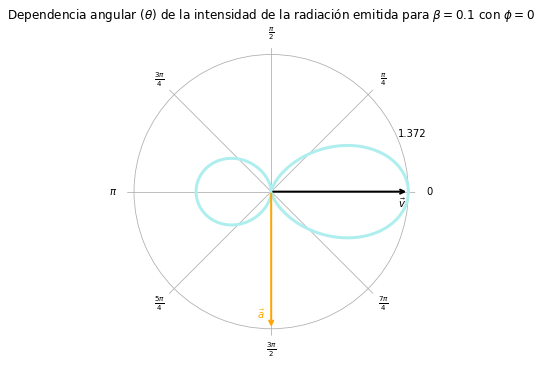

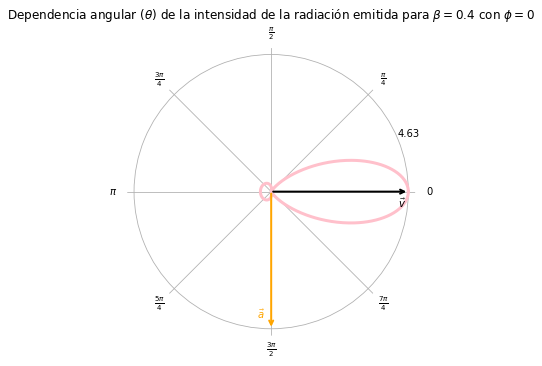

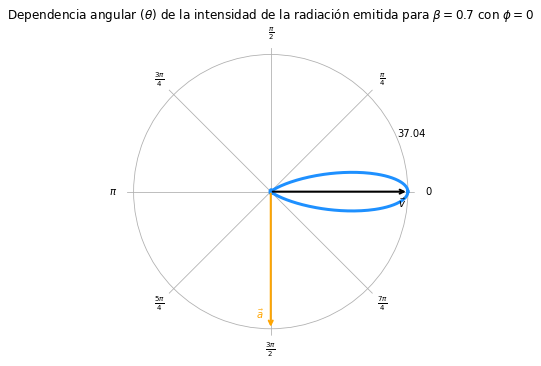

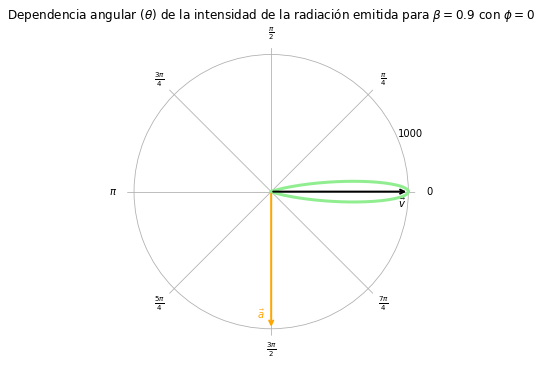

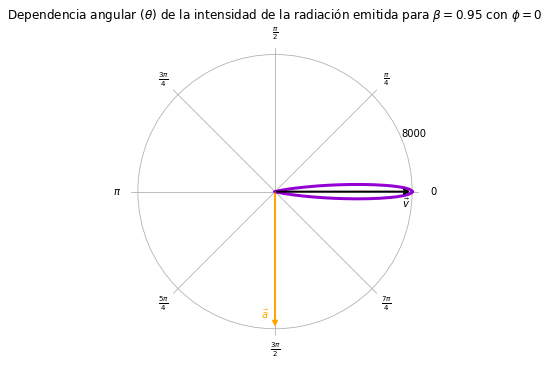

In [54]:
for i in range(len(r)):
    fig = plt.figure()
    rect = [1, 1, 1, 1]
    ax_polar = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar.set_yticks([np.max(r[i])])
    ax_polar.annotate(text=r'', xy=(0,np.max(r[i])), xytext=(0,0), arrowprops=dict(arrowstyle='->', linewidth=2, color='black'))
    ax_polar.annotate(text=r'', xy=(-np.pi/2,np.max(r[i])), xytext=(0,0), arrowprops=dict(arrowstyle='->', linewidth=2, color='orange'))
    ax_polar.text(x=-0.125, y=np.max(r[i])*14/15, s=r'$\vec{v}$')
    ax_polar.text(x=4.6, y=np.max(r[i])*14/15, s=r'$\vec{a}$',  color='orange')
    ax_polar.plot(theta, r[i], linewidth=3, color=colors[i])
    ax_polar.set_title(r'Dependencia angular $(\theta)$ de la intensidad de la radiación emitida para $\beta=${} con $\phi = 0$'.format(betas[i]))
    x_ticks = plt.xticks()[0]
    x_labels =['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
    plt.xticks(x_ticks, x_labels)
    plt.show()

In [55]:
for i in range(len(r)):
    #v = betas[i]*c
    factor = (mu_0*(e**2))/(16*(np.pi**2)*c)
    max_P = factor*np.max(r[i])
    print('Para beta={} la maxima potencia irradiada es del orden de P={}a^2'.format(betas[i], max_P))

Para beta=0.1 la maxima potencia irradiada es del orden de P=9.346794459240483e-55a^2
Para beta=0.4 la maxima potencia irradiada es del orden de P=3.154543129993664e-54a^2
Para beta=0.7 la maxima potencia irradiada es del orden de P=2.5236345039949297e-53a^2
Para beta=0.9 la maxima potencia irradiada es del orden de P=6.813813160786317e-52a^2
Para beta=0.95 la maxima potencia irradiada es del orden de P=5.451050528629036e-51a^2


### Punto 5
Calculamos la potencia total emitida por un electrón en una trayectoria circular y en una trayectoria lineal

In [56]:
def potencia(beta, caso):
    factor = mu_0*(e**2)/(6*np.pi*c)
    gamma = 1/np.sqrt(1 - beta**2)
    if caso == 'lineal': return factor*(gamma**6) 
    return factor*(gamma**4)

In [57]:
potencias_lineal = []
potencias_circular = []
for i in range(len(betas)):
    potencias_lineal.append(potencia(betas[i], 'lineal'))
    potencias_circular.append(potencia(betas[i], 'circular'))
    
for i in range(len(potencias_lineal)):
    print('En el caso {}, para beta={} la magnitud de la potencia irradiada es del orden de P={}a^2'.format('lineal', betas[i], potencias_lineal[i]))
print()
for i in range(len(potencias_circular)):
    print('En el caso {}, para beta={} la magnitud de la potencia irradiada es del orden de P={}a^2'.format('circular', betas[i], potencias_circular[i]))



En el caso lineal, para beta=0.1 la magnitud de la potencia irradiada es del orden de P=5.883059515705222e-54a^2
En el caso lineal, para beta=0.4 la magnitud de la potencia irradiada es del orden de P=9.630990789718405e-54a^2
En el caso lineal, para beta=0.7 la magnitud de la potencia irradiada es del orden de P=4.303267042863802e-53a^2
En el caso lineal, para beta=0.9 la magnitud de la potencia irradiada es del orden de P=8.322389218587644e-52a^2
En el caso lineal, para beta=0.95 la magnitud de la potencia irradiada es del orden de P=6.158784082028896e-51a^2

En el caso circular, para beta=0.1 la magnitud de la potencia irradiada es del orden de P=5.82422892054817e-54a^2
En el caso circular, para beta=0.4 la magnitud de la potencia irradiada es del orden de P=8.090032263363462e-54a^2
En el caso circular, para beta=0.7 la magnitud de la potencia irradiada es del orden de P=2.194666191860539e-53a^2
En el caso circular, para beta=0.9 la magnitud de la potencia irradiada es del orden de P